# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

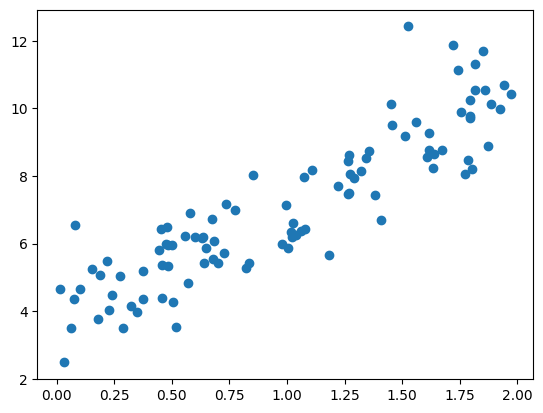

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

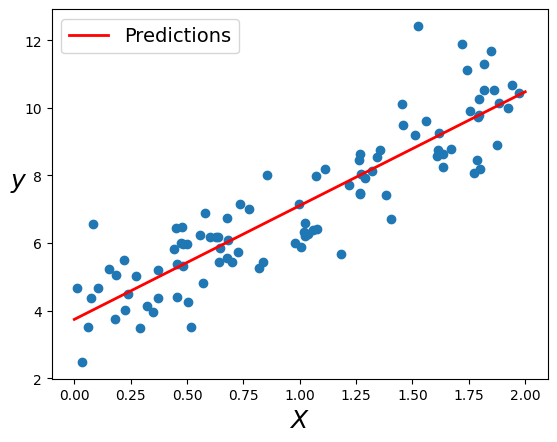

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

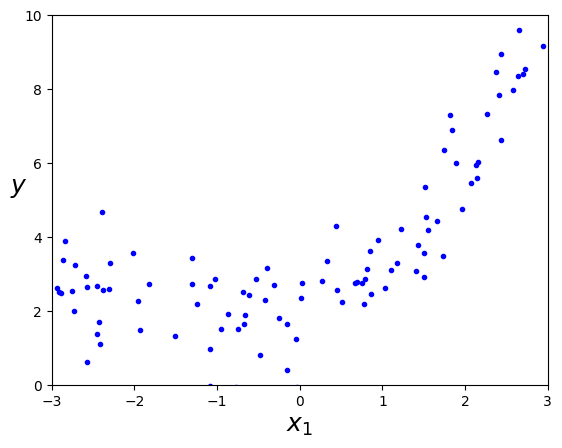

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

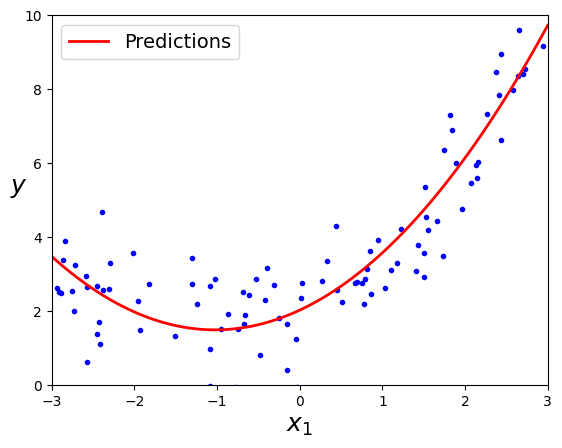

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [25]:
len(X)

1000

In [26]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

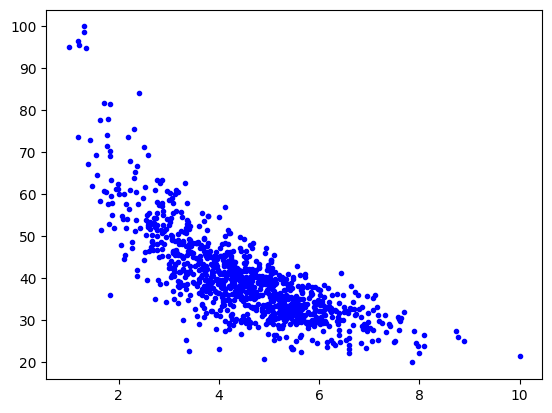

In [27]:
plt.plot(X,y,'b.')

In [28]:
#lineal
# Importacion de  librerias necesarias

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings


In [29]:
# division de los datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [30]:
# se definen las listas para guardar el MAE y el R2
mi_mae= list()
mi_r2= list()

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


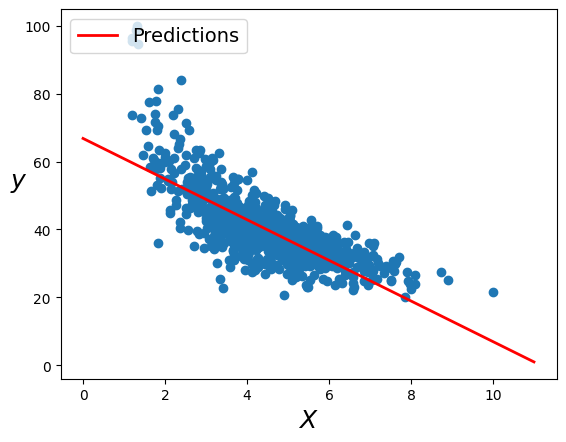

In [31]:
# se crea el metodo de regresion lineal y se grafica el mismo
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(x_train, y_train)

# construct best fit line
X_fit = np.linspace(0, 11, 1000)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(x_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);



In [32]:
#se realiza la prediccion para el conjunto de prueba y se guardan el MAE y el R2 
y_new = linear_reg.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_new)
mi_mae.append(mae)
r2 = r2_score(y_test, y_new)
mi_r2.append(r2)

print("El modelo generado es :", linear_reg.coef_, linear_reg.intercept_)
print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_new)))
print('r2_score', r2)


El modelo generado es : [-5.98882699] 66.83650741226988
Error medio Absoluto (MAE): 5.013587781954963
Root Mean Squared Error: 7.108963321847682
r2_score 0.6116251549562579


In [33]:
#polinomial

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x_train)
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)

X_new=np.linspace(0, 10, 1000).reshape(1000, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
yhat_RP = y_new

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [34]:
#se realiza la prediccion del conjunto prueba y guardamos el valor de mae, r2 en las listas
xt_tr = poly_features.fit_transform(x_test)
y_hat = lin_reg.predict(xt_tr)
pr_r2 = r2_score(y_test, y_hat)
mi_r2.append(pr_r2)

pr_mae = metrics.mean_absolute_error(y_test, y_hat)
mi_mae.append(pr_mae)
print("El modelo generado es :",lin_reg.coef_, lin_reg.intercept_)
print('Error medio Absoluto (MAE):', pr_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('r2_score', pr_r2)

El modelo generado es : [-16.40638102   1.13136095] 88.80179909112496
Error medio Absoluto (MAE): 4.3833025759681075
Root Mean Squared Error: 5.832771301068425
r2_score 0.7385501224942536


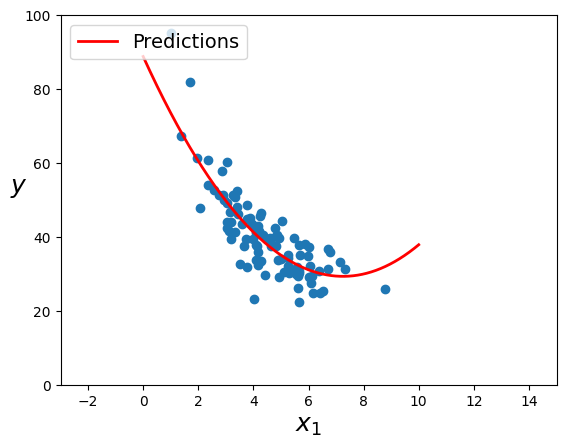

In [35]:

plt.scatter(x_test, y_test)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 15, 0, 100]);

El modelo generado es , [-5.97003397] 66.75243237759665

Error medio Absoluto (MAE): 5.016205738992834
Root Mean Squared Error: 7.111111949820097
r2_score 0.6113903530239646


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


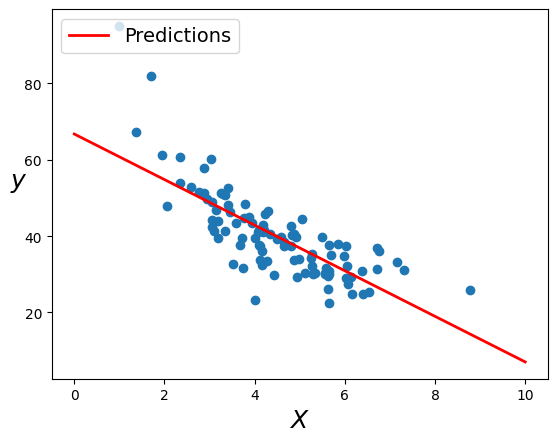

In [36]:
# Metodo Ridge
R_Ridge=Ridge(alpha = 5, solver = 'auto', random_state = 42)
R_Ridge.fit(x_train,y_train)
y_new=R_Ridge.predict(x_test)

X_new = np.linspace(0, 10, 100)
y_hat = R_Ridge.predict(X_new[:, np.newaxis])


plt.scatter(x_test, y_test)
plt.plot(X_new, y_hat, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

rr_mae =  metrics.mean_absolute_error(y_test, y_new)
mi_mae.append(rr_mae)
rr_r2 = r2_score(y_test, y_new) 
mi_r2.append(rr_r2)

print("El modelo generado es ," ,R_Ridge.coef_, R_Ridge.intercept_)
print('\nError medio Absoluto (MAE):', rr_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_new)))
print('r2_score', rr_r2)


C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


El modelo generado es , [-3.15572458] 54.16195119377412

Error medio Absoluto (MAE): 5.681207654677401
Root Mean Squared Error: 8.409660991642687
r2_score:  0.456505036516648


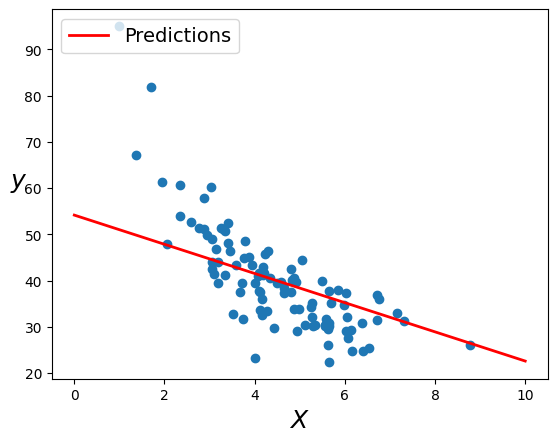

In [37]:
# Metodo Lasso

R_Lasso=Lasso(alpha = 5,  random_state = 42)
R_Lasso.fit(x_train,y_train)
y_new=R_Lasso.predict(x_test)

X_new = np.linspace(0, 10, 100)
y_hat = R_Lasso.predict(X_new[:, np.newaxis])

plt.scatter(x_test, y_test)
plt.plot(X_new, y_hat, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

#se realiza la prediccion para conjunto de prueba y guardamos el valor de mae en la lista
rls_mae =  metrics.mean_absolute_error(y_test, y_new)
mi_mae.append(rls_mae)
rls_r2 = r2_score(y_test, y_new)
mi_r2.append(rls_r2)

print("El modelo generado es ," ,R_Lasso.coef_, R_Lasso.intercept_)
print('\nError medio Absoluto (MAE):', rls_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_new)))
print('r2_score: ', rls_r2)

Metricas de error MAE
[5.013587781954963, 4.3833025759681075, 5.016205738992834, 5.681207654677401]


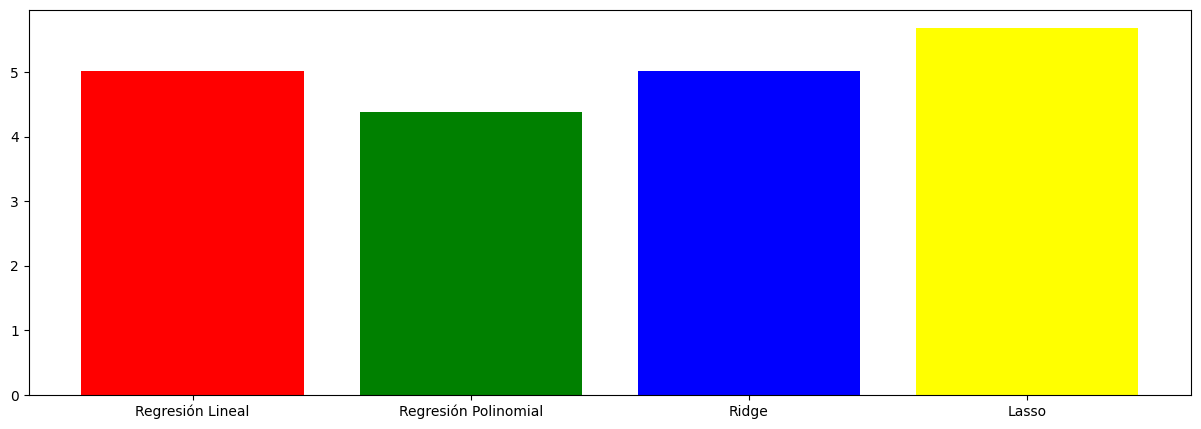

In [38]:
# dibujamos los resultados de cada modelo

#Graficas MAE de los modelos
#Lista con los nombre de los modelos
Modelos = list()
Modelos.append('Regresión Lineal')
Modelos.append('Regresión Polinomial')
Modelos.append('Ridge')
Modelos.append('Lasso')

fig, ax = plt.subplots(figsize =(15, 5))
print("Metricas de error MAE")
print(mi_mae)
Metricas=list(Modelos)
mi_mae=list(mi_mae)
plt.bar(Metricas,mi_mae,color = ['red', 'green', 'blue', 'yellow'])
plt.show()

Metricas R2
[0.6116251549562579, 0.7385501224942536, 0.6113903530239646, 0.456505036516648]


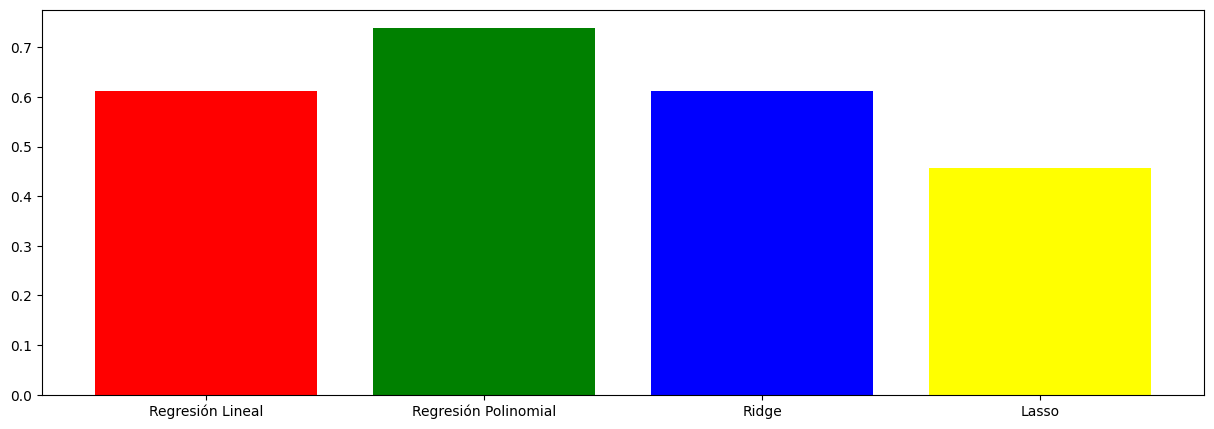

In [39]:
#Graficas R2 de los modelos
#Lista con los nombre de los modelos

fig, ax = plt.subplots(figsize =(15, 5))
print("Metricas R2")
print(mi_r2)
Metricas=list(Modelos)
mi_r2=list(mi_r2)
plt.bar(Metricas,mi_r2,color = ['red', 'green', 'blue', 'yellow'])
plt.show()

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20772,1972200428,20140625T000000,563500.0,3,2.50,1400,1312,3.5,0,0,...,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21528,3416600750,20150217T000000,585000.0,3,2.50,1750,1381,3.0,0,0,...,8,1750,0,2008,0,98122,47.6021,-122.294,1940,4800
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19947,1776460110,20141223T000000,395000.0,4,2.75,2280,5013,2.0,0,0,...,8,2280,0,2009,0,98019,47.7333,-121.976,2130,5121


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [42]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [43]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


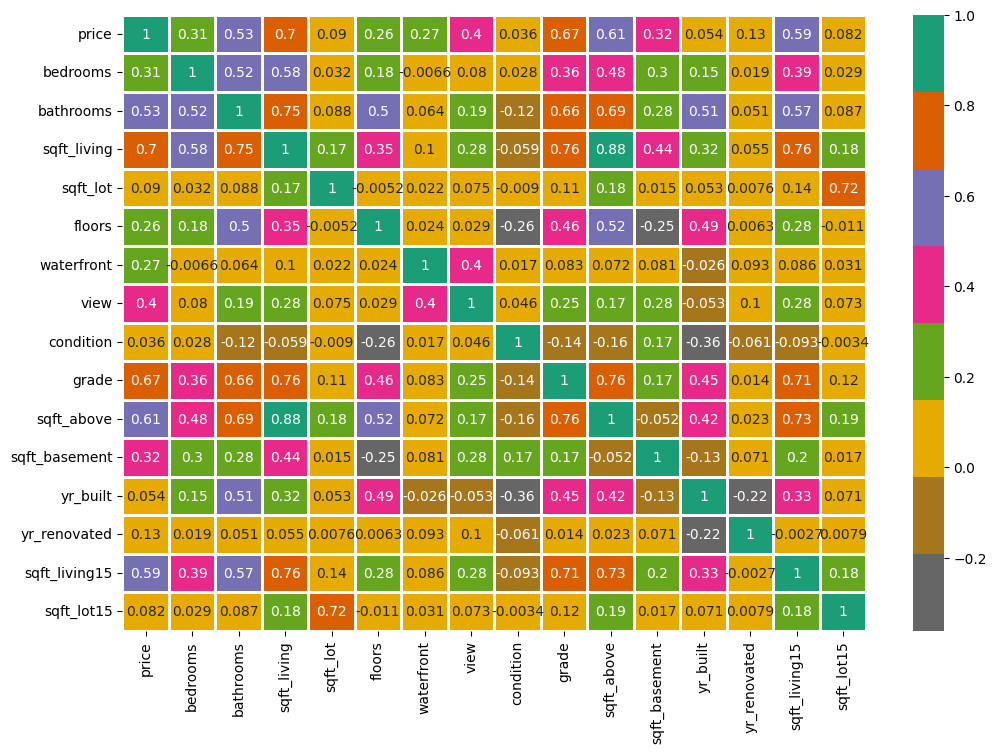

In [44]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [45]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [47]:
#tu codigo aquí
# Creamos listas para almacenar resultados de los modelos
lm_mae= list()
lm_r2=list()

In [48]:
#Regresión Lineal Multiple

#Entrenamos el modelo con conjunto de entranamiento
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train, y_train)

#Calculamos MAE y Score con conjunto test - predicciones
y_hat = lin_reg.predict(X_test)
rl_mae = metrics.mean_absolute_error(y_test,y_hat)
lm_mae.append(rl_mae)
rlm_r2=r2_score(y_test,y_hat)
lm_r2.append(rlm_r2)
print('\nError medio Absoluto (MAE):', rl_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('r2_score:', rlm_r2)


Error medio Absoluto (MAE): 137480.13882730974
Root Mean Squared Error: 232133.36762407963
r2_score: 0.6579723205007673


In [49]:
#regresion multiple polinomial
poly_transform = PolynomialFeatures(degree=2, include_bias = False)
x_fit = poly_transform.fit_transform(X_train)
rlp_reg = LinearRegression(fit_intercept=True)
rlp_reg.fit(x_fit, y_train)

#Calculamos MAE y Score con conjunto test - predicicones
x_fit2 = poly_transform.fit_transform(X_test)
y_hat = rlp_reg.predict(x_fit2)
rpm_mae=metrics.mean_absolute_error(y_test,y_hat)
lm_mae.append(rpm_mae)
rpm_r2=r2_score(y_test,y_hat)
lm_r2.append(rpm_r2)

print('\nError medio Absoluto (MAE):', rpm_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('r2_score:',rpm_r2)


Error medio Absoluto (MAE): 121314.20085784791
Root Mean Squared Error: 186262.97974915314
r2_score: 0.7797889017867747


In [50]:
#regresion Ridge
Rid_reg=Ridge(alpha = 10, solver = 'auto', random_state = 42)
Rid_reg.fit(X_train,y_train)
y_hat=Rid_reg.predict(X_test)

#Calculamos MAE y Score con conjunto test - predicciones

rrm_mae=metrics.mean_absolute_error(y_test,y_hat)
lm_mae.append(rrm_mae)
rrm_r2=r2_score(y_test,y_hat)
lm_r2.append(rrm_r2)
print('\nError medio Absoluto (MAE):', rrm_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('r2_score:', rrm_r2)


Error medio Absoluto (MAE): 137585.199738372
Root Mean Squared Error: 232447.7467268798
r2_score: 0.6570452743997188


In [51]:
#Regresion lasso
LS_reg=Lasso(alpha = 8,random_state = 42, max_iter=1000)
LS_reg.fit(X_train,y_train)
y_hat=LS_reg.predict(X_test)

#Calculamos MAE y Score con conjunto test - predicicones

rlsm_mae=metrics.mean_absolute_error(y_test,y_hat)
lm_mae.append(rlsm_mae)
rlsm_r2=r2_score(y_test,y_hat)
lm_r2.append(rlsm_r2)

print('\nError medio Absoluto (MAE):',rlsm_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
print('r2_score', rlsm_r2)


Error medio Absoluto (MAE): 137483.60059952753
Root Mean Squared Error: 232142.66259033076
r2_score 0.6579449293555899


C:\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.054e+14, tolerance: 2.572e+11
  model = cd_fast.enet_coordinate_descent(


Metricas de error MAE
[137480.13882730974, 121314.20085784791, 137585.199738372, 137483.60059952753]


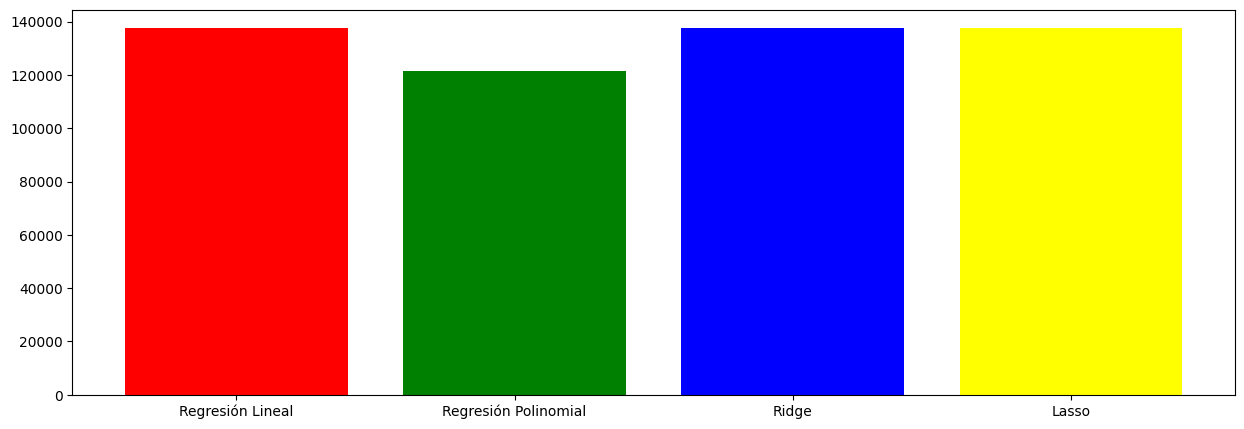

In [54]:
#Graficamos la metrica de error MAE
fig, ax = plt.subplots(figsize =(15, 5))
print("Metricas de error MAE")
print(lm_mae)
Metricas=list(Modelos)
lm_mae=list(lm_mae)
plt.bar(Metricas,lm_mae,color = ['red', 'green', 'blue', 'yellow'])
plt.show()

Metricas R2
[0.6579723205007673, 0.7797889017867747, 0.6570452743997188, 0.6579449293555899]


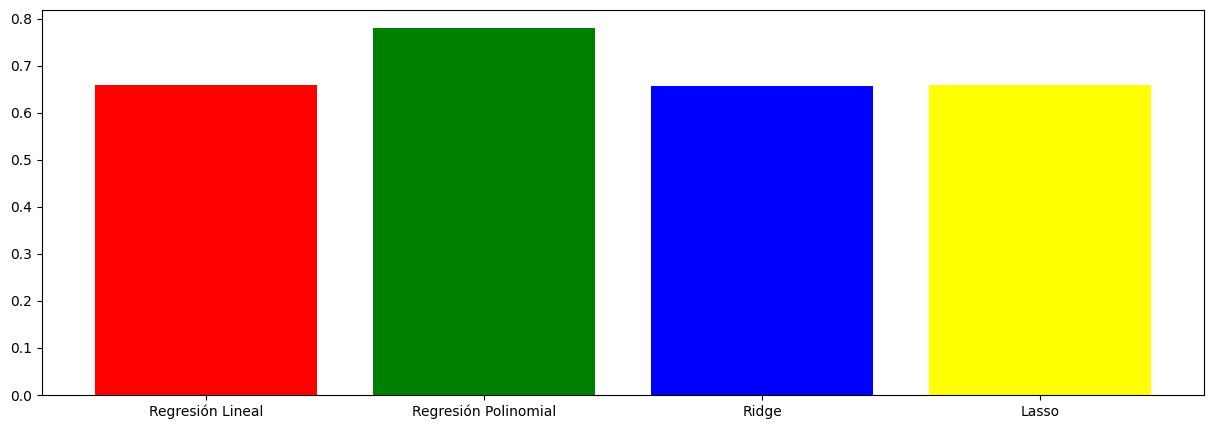

In [55]:
#Graficamos la metrica R2
fig, ax = plt.subplots(figsize =(15, 5))
print("Metricas R2")
print(lm_r2)
Metricas=list(Modelos)
lm_r2=list(lm_r2)
plt.bar(Metricas,lm_r2,color = ['red', 'green', 'blue', 'yellow'])
plt.show()